In [8]:
import sqlite3
import pandas as pd
from timeit import default_timer as timer

abstracts_db_name = 'plos_cb_abstracts_3years'
db_path = 'data/' + abstracts_db_name + '.db'

# connect to the database
db = sqlite3.connect(db_path)
print('database connected')

# cursor method
#cursor = db.cursor()
#cursor.execute("SELECT * FROM plos_cb_abstracts")

# since there are ~ 5,000 entries, just read directly into a pandas dataframe
df = pd.read_sql_query("select * from {}".format(abstracts_db_name), db)
df



database connected


,id,url,authors,date,title,abstract,author_summary
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi..."
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,..."
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t..."
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...


In [9]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

def clean_text(paragraph):
    
    clean_words = []
    words = paragraph.split()
    
    for word in words:
        
        word = word.lower()
        
        # pick off any leading punctuation or trailing punctuation
        finished_checking_prefix = False
        while not(finished_checking_prefix):
            try:
                this_char = word[0]
                if this_char in string.punctuation:
                    word = word[1:] # snip leading punctuation
                else:
                    finished_checking_prefix = True
            except:
                # no more characters to check
                finished_checking_prefix = True
        
        finished_checking_postfix = False
        while not(finished_checking_postfix):
            try:
                this_char = word[-1]
                if this_char in string.punctuation:
                    word = word[:-1] # snip trailing punctuation
                else:
                    finished_checking_postfix = True
            except:
                # no more characters to check
                finished_checking_postfix = True
        
        # could split on slashes to handle this case: e.g. structure/function...but first need to check for url structure
        #word = " ".join(word.split('/'))
        
        clean_words.append(word)

    # or, better, use textblob Word lemmatize
    clean_paragraph = " ".join(clean_words)
    
    return clean_paragraph # return paragraph with words separated by spaces and no generic punctuation

In [10]:
# update dataframe with cleaned text

df['abstract_clean'] = ""
for idx,abstract in enumerate(df['abstract']):
    df['abstract_clean'].iloc[idx] = clean_text(abstract) # norm the text
    
df['author_summary_clean'] = ""  # note - currently not using this
for idx,summary in enumerate(df['author_summary']):
    df['author_summary_clean'].iloc[idx] = clean_text(summary) # norm the text

df    

,id,url,authors,date,title,abstract,author_summary,abstract_clean,author_summary_clean
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...,left-censored missing values commonly exist in...,missing values caused by the limit of detectio...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...,the binary state speciation and extinction bis...,an important challenge in computational biolog...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...,epilepsy is one of the most common neurologica...,epilepsy is a common neurological disorder cha...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi...",the most frequent form of pairwise synthetic l...,synthetic lethality sl in which the combined k...
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,...",reactome is a free open-source open-data curat...,to better support genome analysis modeling sys...
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t...",ribosome queuing is a fundamental phenomenon s...,during translation multiple ribosomes may tran...
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...,the ecto-5’-nucleotidase cd73 plays an importa...,nucleotidases play a central role in maintaini...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...,despite half-a-century of research since the s...,the functional role of the dorsal lateral geni...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found,the mummer system and the genome sequence alig...,no author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...,viruses have two modes spread in a host body o...,viruses such as human immunodeficiency virus a...


In [11]:
from collections import defaultdict
import numpy as np

# todo generate word count
word_count = 0
dictionary = defaultdict(int)

# get all the words from the abstracts and author summaries
for idx,abstract in enumerate(df['abstract_clean']):
    author_summary = df['author_summary_clean'].iloc[idx]
    for word in abstract.split(' '):
        dictionary[word] += 1
    for word in author_summary.split(' '):
        dictionary[word] += 1

# get word statistics:

# number of words
numWords = np.sum(dictionary.values())
print(numWords)
# number of unique words
numUniqueWords = len(dictionary.keys())
print(numUniqueWords)

# snapshot of percentiles in the word frequency distribution
print(np.min(dictionary.values()))
print(np.percentile(dictionary.values(),25))
print(np.percentile(dictionary.values(),50))
print(np.percentile(dictionary.values(),75))
print(np.percentile(dictionary.values(),90))
print(np.percentile(dictionary.values(),95))
print(np.percentile(dictionary.values(),99))
print(np.max(dictionary.values()))

# histogram of word frequency
import matplotlib.pyplot as plt

plt.figure()
plt.hist(dictionary.values(), 100)
plt.title('historam of word occurrences is very long tailed')
plt.xlim([0, 100000])
plt.show()


dict_values([3, 89, 220, 152, 111, 22730, 116, 30, 349, 27588, 4386, 4503, 208, 5598, 2013, 2411, 317, 6, 3, 3277, 332, 26, 9835, 517, 166, 29, 59, 5509, 82, 501, 308, 1599, 218, 16, 1208, 2829, 1756, 865, 526, 24568, 54159, 39, 43313, 288, 777, 21830, 90, 178, 1338, 10786, 6, 134, 12824, 4058, 31, 6, 5, 1234, 1406, 6, 434, 6823, 1291, 514, 1456, 33, 1227, 438, 157, 2134, 3828, 86, 81, 1828, 2029, 14290, 80, 242, 386, 92, 410, 7, 47, 225, 117, 92, 44, 1171, 13, 973, 303, 62, 147, 5, 314, 6806, 666, 1, 132, 6714, 93, 1, 1, 1060, 186, 906, 135, 30, 2, 952, 719, 43, 282, 62, 351, 13, 1, 157, 2023, 195, 2307, 1, 149, 7, 272, 39, 368, 289, 529, 1, 372, 987, 143, 23, 209, 15, 131, 131, 302, 3825, 1, 12, 392, 494, 1455, 761, 4, 4662, 16, 79, 646, 11, 41, 4, 5330, 66, 984, 446, 27, 545, 158, 54, 444, 395, 222, 17, 333, 561, 4, 75, 170, 108, 157, 409, 11, 244, 2, 88, 75, 80, 713, 710, 156, 174, 2, 187, 93, 413, 1061, 241, 70, 67, 539, 58, 147, 845, 2, 1414, 1497, 652, 26, 1192, 270, 1481, 359, 

TypeError: unsupported operand type(s) for *: 'dict_values' and 'float'

In [12]:
# data formatting for word2vec

print('generating sentences data structure...')
list_of_sentences = []
# generate the appropriate input format
for idx,abstract in enumerate(df['abstract_clean']):
    #print(df['title'].iloc[idx])
    author_summary = df['author_summary_clean'].iloc[idx]
    list_of_sentences.append(abstract.split(' '))
    #list_of_sentences.append(author_summary.split(' '))
print('sentences data structure generated')


print(list_of_sentences[3])


generating sentences data structure...
sentences data structure generated
['the', 'most', 'frequent', 'form', 'of', 'pairwise', 'synthetic', 'lethality', 'sl', 'in', 'metabolic', 'networks', 'is', 'known', 'as', 'plasticity', 'synthetic', 'lethality', 'it', 'occurs', 'when', 'the', 'simultaneous', 'inhibition', 'of', 'paired', 'functional', 'and', 'silent', 'metabolic', 'reactions', 'or', 'genes', 'is', 'lethal', 'while', 'the', 'default', 'of', 'the', 'functional', 'partner', 'is', 'backed', 'up', 'by', 'the', 'activation', 'of', 'the', 'silent', 'one', 'using', 'computational', 'techniques', 'on', 'bacterial', 'genome-scale', 'metabolic', 'reconstructions', 'we', 'found', 'that', 'the', 'failure', 'of', 'the', 'functional', 'partner', 'triggers', 'a', 'critical', 'reorganization', 'of', 'fluxes', 'to', 'ensure', 'viability', 'in', 'the', 'mutant', 'which', 'not', 'only', 'affects', 'the', 'sl', 'pair', 'but', 'a', 'significant', 'fraction', 'of', 'other', 'interconnected', 'reactions

In [13]:
# word embeddings with word2vec
from gensim.models import Word2Vec

start = timer()

DIM = 300;
model = Word2Vec(sentences=list_of_sentences, # tokenized senteces, list of list of strings
                 size=DIM,  # size of embedding vectors
                 workers=1, # how many threads?
                 min_count=20, # minimum frequency per token, filtering rare words
                 sample=0.05, # weight of downsampling common words
                 sg = 0, # should we use skip-gram? if 0, then cbow
                 iter=5,
                 hs = 0)

end = timer()
print("time elapsed: ")
print(end - start)

C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


time elapsed: 
8.953264769112145


In [14]:
# save the model to a database

import matplotlib.pyplot as plt
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

output_name = 'wordEmbeddings_keyedVectorObject_3years'

word_vectors = model.wv
fname = get_tmpfile(output_name + '.kv')
word_vectors.save(fname)

plt.figure()
plt.plot(word_vectors['experiment'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
# represent each article as a point in embedding-space
# todo - maybe the sum should happen *before* the embedding step (depends whether there's a softmax layer )

abstract_embedding = np.zeros((df.shape[0],DIM)) # number of abstracts x dimensionality of the embedding
#abstract_embedding_alt = np.zeros((df.shape[0],DIM)) # sum before the embedding step (no assumption of global scale linearity in the embedded space)
#author_summary_embedding = np.zeros((df.shape[0],DIM))

for idx,abstract in enumerate(df['abstract_clean']):
    v = np.zeros((1,DIM))
    for word in abstract.split(' '):
        try: 
            word_embedding = model[word]
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
        v = v + word_embedding
    abstract_embedding[idx,:] = v
 
'''
for idx,summary in enumerate(df['author_summary_clean']):
    v = np.zeros((1,DIM))
    for word in summary.split(' '):
        try: 
            word_embedding = model[word]
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
        v = v + word_embedding
    author_summary_embedding[idx,:] = v
'''    
    
print(np.shape(abstract_embedding))
#print(np.shape(author_summary_embedding))


C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(2525, 300)


(20,)
(20, 300)


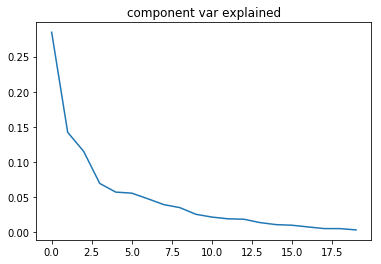

[0.28474709 0.14206151 0.11479616 0.06914414 0.05680095 0.05532621
 0.04732148 0.03898118 0.03467817 0.02517659 0.02121835 0.01873858
 0.01813645 0.01335559 0.01044831 0.00956365 0.00714675 0.00479063
 0.00476117 0.00288955]
(2525, 20)


In [26]:
# todo try pca to bring the dimensionality down
from sklearn.decomposition import PCA
import numpy as np

N_COMPONENTS = 20 # from inspection

pca = PCA(n_components=N_COMPONENTS) # 
pca.fit(abstract_embedding)

print(np.shape(pca.singular_values_))
print(np.shape(pca.components_))

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('component var explained')  # only the first ~40 components are making strong contributions ( >= ~1%)
plt.show()

print(pca.explained_variance_ratio_)

abstract_embedding_pca_compression = pca.transform(abstract_embedding)
print(np.shape(abstract_embedding_pca_compression))

In [27]:
# run umap to crunch down the pca projection

import umap

abstract_embedding_pca_umap_compression = umap.UMAP(
    n_neighbors=100, # 30 is probably a good value for clustering applications
    min_dist=0.0,
    n_components=5, # target_dimensionality
    random_state=42,
    metric='cosine'
).fit_transform(abstract_embedding_pca_compression)



44


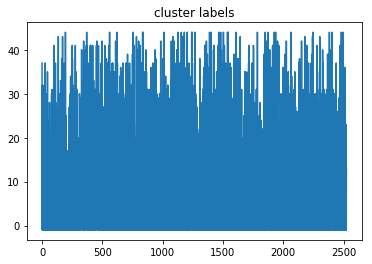

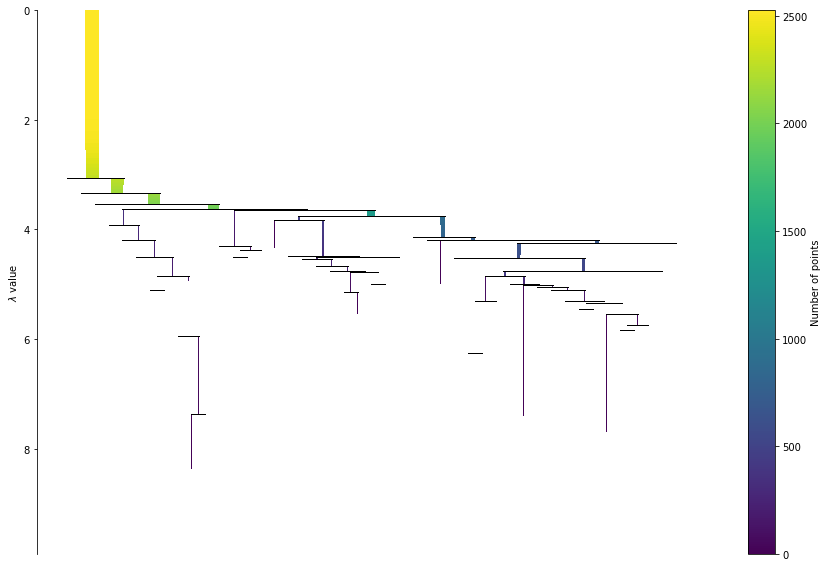

{0: 11, 1: 11, 2: 16, 3: 13, 4: 15, 5: 19, 6: 13, 7: 15, 8: 58, 9: 40, 10: 14, 11: 10, 12: 23, 13: 32, 14: 18, 15: 22, 16: 13, 17: 14, 18: 16, 19: 25, 20: 30, 21: 18, 22: 15, 23: 15, 24: 55, 25: 27, 26: 12, 27: 59, 28: 24, 29: 39, 30: 83, 31: 42, 32: 14, 33: 10, 34: 17, 35: 26, 36: 21, 37: 48, 38: 13, 39: 10, 40: 14, 41: 30, 42: 13, 43: 11, 44: 34, -1: 1447}


In [40]:
# try out some clustering

import hdbscan
#import seaborn as sns

# input is samples x features

clusterer = hdbscan.HDBSCAN(cluster_selection_method='leaf',min_samples=3,min_cluster_size=10) # cluster_selection_method='leaf',
labels = clusterer.fit_predict(abstract_embedding_pca_umap_compression) # realized this return was available just now

print(clusterer.labels_.max())
N_clusters = clusterer.labels_.max()
cluster_labels = clusterer.labels_.tolist()

plt.figure()
plt.plot(clusterer.labels_)
plt.title('cluster labels')
plt.show()

plt.figure(figsize=(15,10))
clusterer.condensed_tree_.plot() #select_clusters=True,
                               # selection_palette=sns.color_palette('deep', 8))
plt.show()

cluster_sizes = dict((x,cluster_labels.count(x)) for x in set(cluster_labels))
print(cluster_sizes)

finished umap compression
(2525, 2)


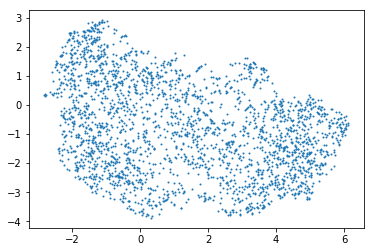

(2525,)
clabels
[ True False  True ...  True False  True]


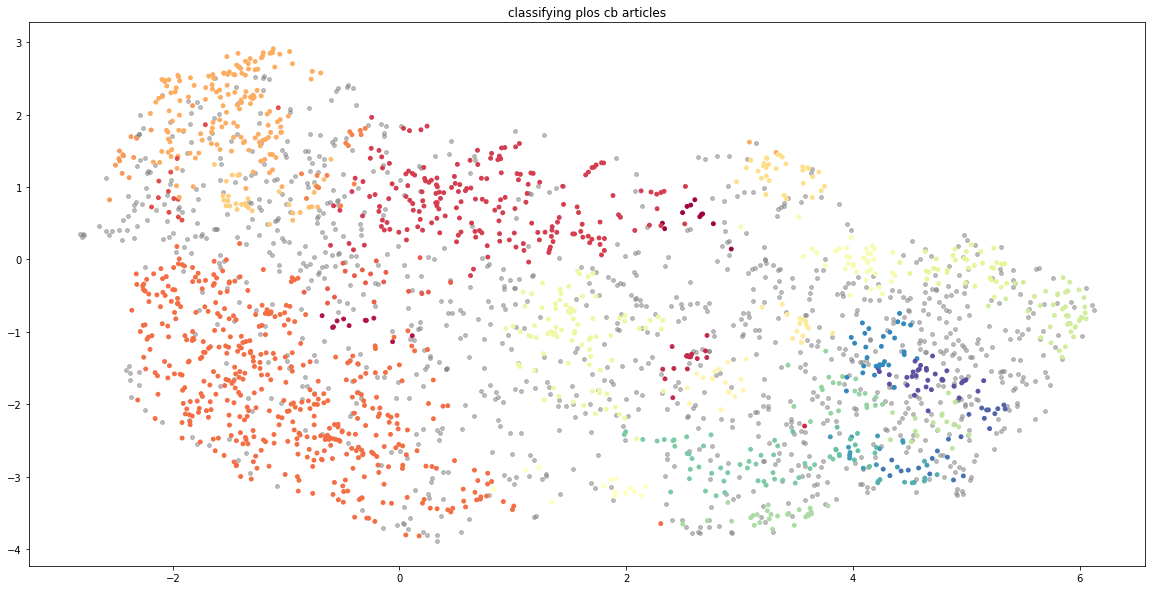

In [37]:
# try a quick viz

import umap

abstract_embedding_viz_compression = umap.UMAP(
    n_neighbors=12, # 15 is probably a good value for viz applications
    min_dist=0.1,
    n_components=2, # target_dimensionality
    random_state=42,
    metric='cosine'
).fit_transform(abstract_embedding_pca_compression)

print('finished umap compression')
print(np.shape(abstract_embedding_viz_compression))

plt.figure()
plt.scatter(abstract_embedding_viz_compression[:,0],abstract_embedding_viz_compression[:,1],
           s=1)
plt.show()

print(np.shape(cluster_labels))


plt.figure(figsize=(20,10))
c_labels = (labels >= 0) # non - null
print('clabels')
print(c_labels)
plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.5, 0.5, 0.5),
            s=15,
            alpha=0.5)
plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
            abstract_embedding_viz_compression[c_labels, 1],
            c=labels[c_labels],
            s=15,
            cmap='Spectral');
plt.title('classifying plos cb articles')
plt.savefig('progress2.png')
plt.show()



4.0


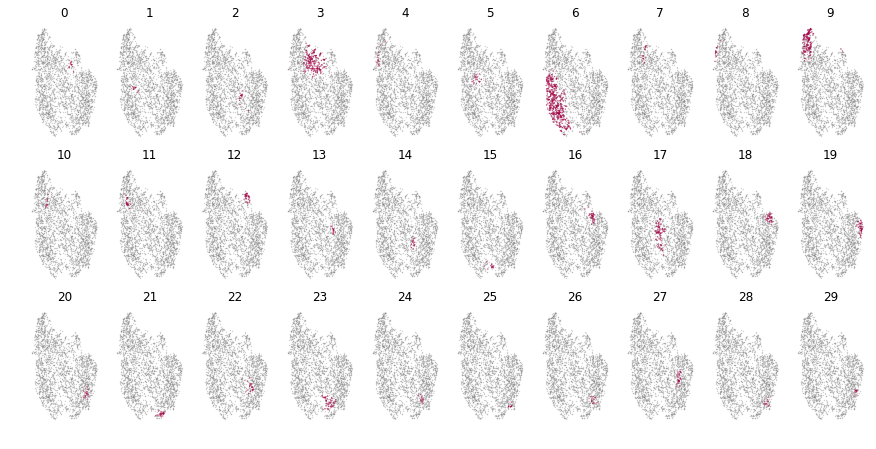

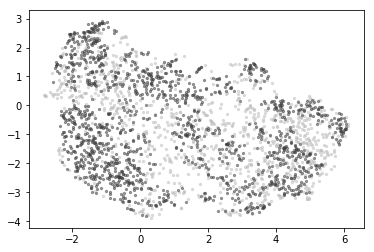

In [38]:
# plot each cluster individually

panels_per_row = 10
N_rows = np.ceil( (N_clusters+1) / panels_per_row) # extra panel for showing null cluster
print(N_rows)
plt.figure(figsize=(15,10))
for idx in range(N_clusters):
    plt.subplot(N_rows, panels_per_row, idx+1)
    
    c_labels = (labels == idx)
    plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
    plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
                abstract_embedding_viz_compression[c_labels, 1],
                c=labels[c_labels],
                s=0.1,
                cmap='Spectral');
    
    plt.axis('off')
    plt.title(idx)

plt.show()

plt.figure()
c_labels = (labels == -1)
plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
            abstract_embedding_viz_compression[c_labels, 1],
            c=(0.75, 0.75, 0.75),
            s=5,
            alpha=0.5)
plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.25,0.25,0.25),
            s=5,
            alpha=0.5) # plot these 
plt.show()

In [41]:
for cluster_idx in range(N_clusters):
    print('articles for cluster ' + str(cluster_idx) + ':')
    
    # list the articles
    source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten
    print(source_idxs)
    
    cluster_texts = []
    for source_idx in source_idxs:
        cluster_texts.append(list_of_sentences[source_idx])
    #print(cluster_texts)
    
    cluster_titles = []
    for source_idx in source_idxs:
        cluster_titles.append(df['title'].iloc[source_idx])
    print(cluster_titles)
    
    print(' ')
    print(' ')

articles for cluster 0:
[ 657  681 1050 1069 1294 1329 1527 2107 2153 2380 2486]
['\nHLA class I haplotype diversity is consistent with selection for frequent existing haplotypes            ', '\nStabilization of diastolic calcium signal via calcium pump regulation of complex local calcium releases and transient decay in a computational model of cardiac pacemaker cell with individual release channels            ', '\nA Well-Defined Readily Releasable Pool with Fixed Capacity for Storing Vesicles at Calyx of Held            ', '\nEffects of Darwinian Selection and Mutability on Rate of Broadly Neutralizing Antibody Evolution during HIV-1 Infection            ', '\nPreTIS: A Tool to Predict Non-canonical 5? UTR Translational Initiation Sites in Human and Mouse            ', '\nMalaria Elimination Campaigns in the Lake Kariba Region of Zambia: A Spatial Dynamical Model            ', '\nThree-Dimensional Gradients of Cytokine Signaling between T Cells            ', '\nRates of CTL Killing 

In [52]:
# compare some cluster members (sanity check / figure out how to do better feature selection)
import random
cluster_idx = random.randint(0,N_clusters-1)
print("cluster index = " + str(cluster_idx))

source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten

# words from abstract
cluster_texts = []
for source_idx in source_idxs:
    cluster_texts.append(list_of_sentences[source_idx])
print(*cluster_texts,sep='\n')

# cluster indices
source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten
print(*source_idxs)

# titles
cluster_titles = []
for source_idx in source_idxs:
    cluster_titles.append(df['title'].iloc[source_idx])
print(*cluster_titles,sep='\n')

############################################################
# draw word cloud for overall cluster text
# print a few examples from the cluster



cluster index = 26
['ancestral', 'state', 'reconstructions', 'in', 'bayesian', 'phylogeography', 'of', 'virus', 'pandemics', 'have', 'been', 'improved', 'by', 'utilizing', 'a', 'bayesian', 'stochastic', 'search', 'variable', 'selection', 'bssvs', 'framework', 'recently', 'this', 'framework', 'has', 'been', 'extended', 'to', 'model', 'the', 'transition', 'rate', 'matrix', 'between', 'discrete', 'states', 'as', 'a', 'generalized', 'linear', 'model', 'glm', 'of', 'genetic', 'geographic', 'demographic', 'and', 'environmental', 'predictors', 'of', 'interest', 'to', 'the', 'virus', 'and', 'incorporating', 'bssvs', 'to', 'estimate', 'the', 'posterior', 'inclusion', 'probabilities', 'of', 'each', 'predictor', 'although', 'the', 'latter', 'appears', 'to', 'enhance', 'the', 'biological', 'validity', 'of', 'ancestral', 'state', 'reconstruction', 'there', 'has', 'yet', 'to', 'be', 'a', 'comparison', 'of', 'phylogenies', 'created', 'by', 'the', 'two', 'methods', 'in', 'this', 'paper', 'we', 'compar